In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("rainfall in india 1901-2015.csv")

In [3]:
df.dtypes

SUBDIVISION     object
YEAR             int64
JAN            float64
FEB            float64
MAR            float64
APR            float64
MAY            float64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC            float64
ANNUAL         float64
Jan-Feb        float64
Mar-May        float64
Jun-Sep        float64
Oct-Dec        float64
dtype: object

In [4]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [5]:
data1 = df.groupby(['SUBDIVISION'])[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'NOV', 'DEC']]

In [6]:
data=data1.get_group(('KERALA'))
data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,NOV,DEC
3887,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,350.8,48.4
3888,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,158.3,121.5
3889,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,157.0,59.0
3890,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,33.9,3.3
3891,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,74.4,0.2


In [7]:
data.set_index('YEAR', inplace = True)
data.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,NOV,DEC
YEAR,,,,,,,,,,,
1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,350.8,48.4
1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,158.3,121.5
1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,157.0,59.0
1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,33.9,3.3
1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,74.4,0.2


In [8]:
data.shape

(115, 11)

In [9]:
data_np = data.to_numpy()
dates = pd.date_range(start='1901-01', freq='MS', periods=data_np.size)

data_np = data_np.reshape(-1, 1)
df = pd.DataFrame({'Mean': data_np.flatten()})
df.set_index(dates, inplace=True)
df.head()

,Mean
1901-01-01,28.7
1901-02-01,44.7
1901-03-01,51.6
1901-04-01,160.0
1901-05-01,174.7


Text(0, 0.5, 'Rainfall Mean across Month')

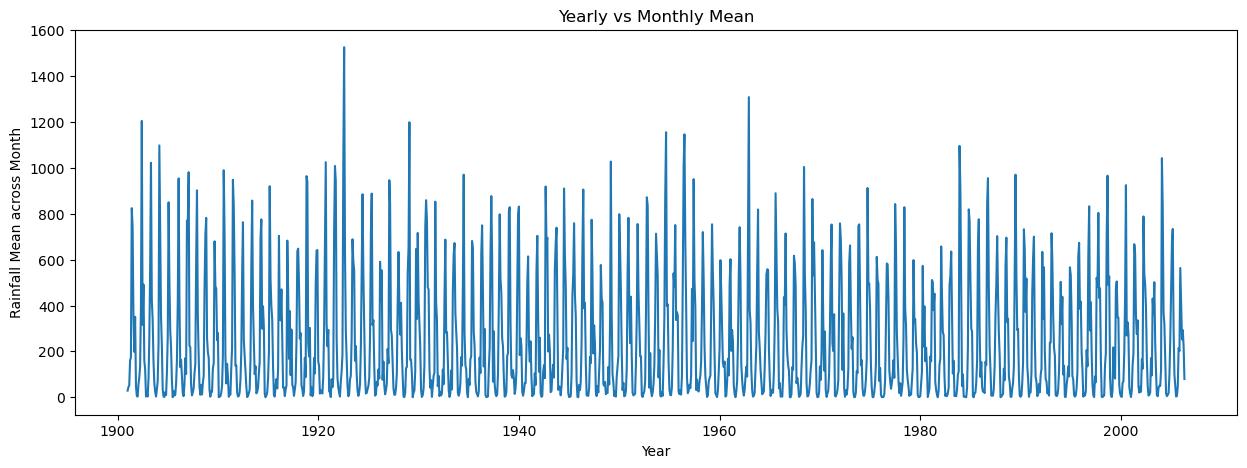

In [10]:
plt.figure(figsize = (15,5))
plt.plot(df.index, df['Mean'])
plt.title('Yearly vs Monthly Mean')
plt.xlabel('Year')
plt.ylabel('Rainfall Mean across Month')

In [11]:
dataset = df.values
dataset.shape

(1265, 1)

In [12]:
train = dataset[0:1000,:]
test = dataset[1000:,:]

In [13]:
train.shape,test.shape

((1000, 1), (265, 1))

In [14]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM

In [15]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data.shape

(1265, 1)

In [16]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [17]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(940, 60, 1)

In [18]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(units = 50))
model.add(Dense(1))

In [19]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(x_train, y_train, epochs=10, batch_size = 2, verbose = 2)


Epoch 1/10

470/470 - 26s - loss: 0.0196 - 26s/epoch - 56ms/step
Epoch 2/10
470/470 - 21s - loss: 0.0107 - 21s/epoch - 46ms/step
Epoch 3/10
470/470 - 21s - loss: 0.0094 - 21s/epoch - 45ms/step
Epoch 4/10
470/470 - 21s - loss: 0.0091 - 21s/epoch - 45ms/step
Epoch 5/10
470/470 - 21s - loss: 0.0087 - 21s/epoch - 45ms/step
Epoch 6/10
470/470 - 21s - loss: 0.0088 - 21s/epoch - 45ms/step
Epoch 7/10
470/470 - 21s - loss: 0.0086 - 21s/epoch - 44ms/step
Epoch 8/10
470/470 - 20s - loss: 0.0086 - 20s/epoch - 42ms/step
Epoch 9/10
470/470 - 20s - loss: 0.0086 - 20s/epoch - 42ms/step
Epoch 10/10
470/470 - 20s - loss: 0.0085 - 20s/epoch - 42ms/step


In [20]:
inputs = df[len(df) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

In [21]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [22]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
Mean = model.predict(X_test)
Mean1 = scaler.inverse_transform(Mean)

9/9 [==============================] - 2s 18ms/step


In [23]:
rms=np.sqrt(np.mean(np.power((test-Mean1),2)))
rms

124.07556608767827

C:\Users\HP\AppData\Local\Temp\ipykernel_11564\2690443681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'Predictions'] = Mean1


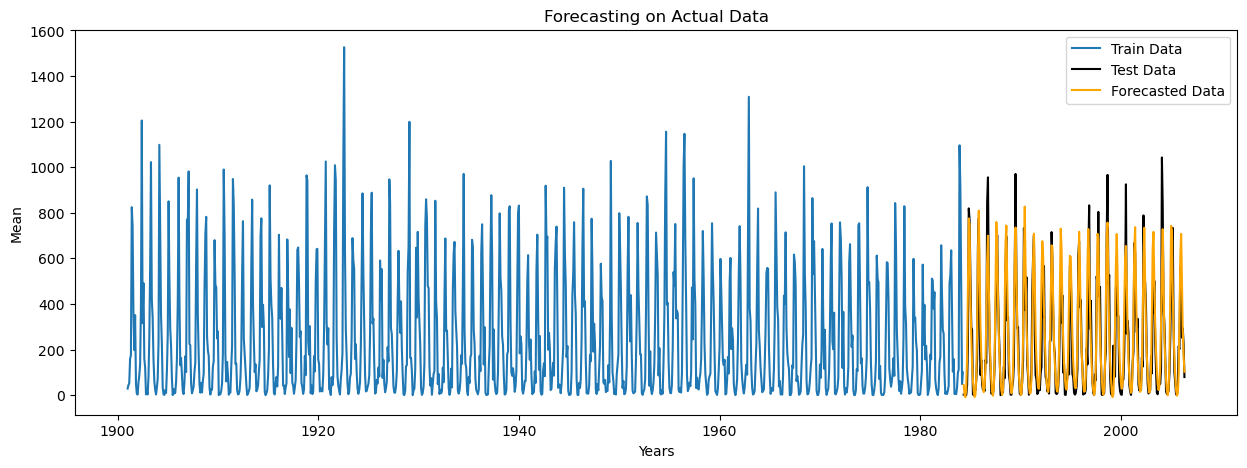

In [24]:
train = df[:1000]
test = df[1000:]
test.loc[:, 'Predictions'] = Mean1
plt.figure(figsize=(15,5))
plt.plot(train['Mean'], label='Train Data')
plt.plot(test['Mean'], color='black', label='Test Data')
plt.plot(test['Predictions'], color='orange', label='Forecasted Data')
plt.xlabel('Years')
plt.ylabel('Mean')
plt.title('Forecasting on Actual Data')
plt.legend()
plt.show()

In [39]:
df.tail()

,Mean
2006-01-01,406.0
2006-02-01,252.2
2006-03-01,292.9
2006-04-01,223.6
2006-05-01,79.4


In [25]:
trainpred = model.predict(X_test,steps=2)

2/2 [==============================] - 0s 40ms/step


In [26]:
pred = scaler.inverse_transform(trainpred)

In [57]:
date_ind = pd.date_range(start = '2006-05-01', freq = 'MS', end = '2028-5-1')

In [58]:
new_df = pd.DataFrame({'Predicted_values':pred[:,0]})

In [59]:
new_df.set_index(date_ind, inplace = True)

In [61]:
new_df

,Predicted_values
2006-05-01,44.488976
2006-06-01,2.746871
2006-07-01,-9.150750
2006-08-01,27.913172
2006-09-01,167.323227
...,...
2028-01-01,707.463318
2028-02-01,473.605743
2028-03-01,284.069214
2028-04-01,174.898911


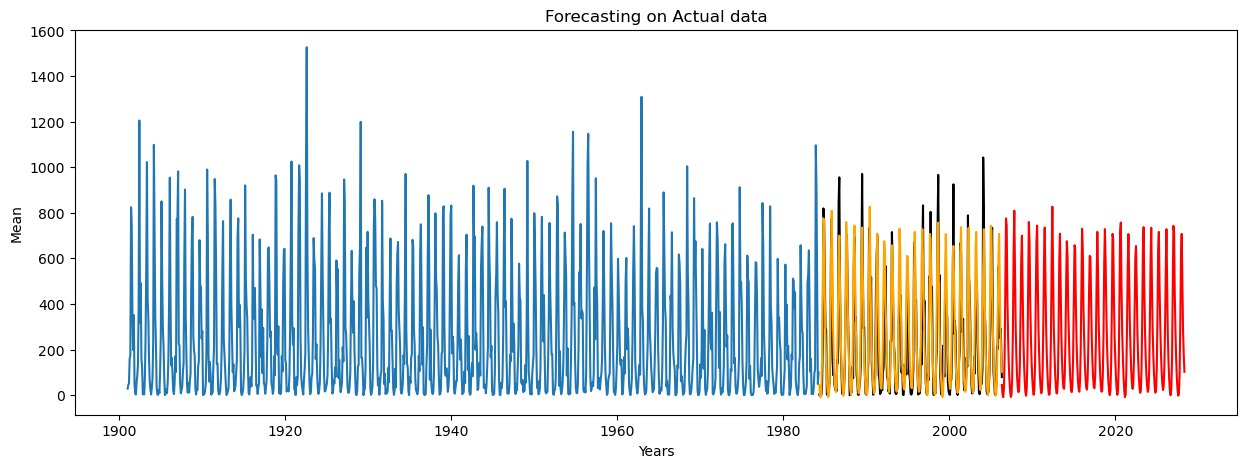

In [62]:
plt.figure(figsize=(15,5))
plt.plot(train['Mean'])
plt.plot(test['Mean'], color = 'black')
plt.plot(test['Predictions'], color = 'orange')
plt.plot(new_df['Predicted_values'], color = 'red')
plt.xlabel('Years')
plt.ylabel('Mean')
plt.title('Forecasting on Actual data')
plt.show()

In [102]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def predict_rainfall_with_year_month(model, scaler, year, month):
    # Create a feature vector from year and month
    # Example encoding: Normalize the year and month as input features
    max_year = 2050  # Assuming the model was trained up to 2050
    min_year = 2006  # Assuming the model was trained from 1900
    
    year_norm = (year - min_year) / (max_year - min_year)  # Normalize year
    month_norm = month / 12  # Normalize month (1-12 scaled to 0-1)
    
    # Create a sequence-like structure (LSTM expects sequences)
    input_sequence = np.array([year_norm, month_norm]).reshape(1, 2, 1)
    
    # Predict rainfall based on the year and month
    predicted_scaled = model.predict(input_sequence)
    
    # Inverse scaling to get the actual prediction
    predicted_value = scaler.inverse_transform(predicted_scaled)[0][0]
    
    # Print the prediction based on year and month
    print(f"Predicted rainfall for {year}-{month:02}: {predicted_value}")
    return predicted_value

# Example: Predicting rainfall for March 2024
predicted_rainfall = predict_rainfall_with_year_month(model, scaler, 2024, 8)

1/1 [==============================] - 0s 44ms/step
Predicted rainfall for 2024-08: 300.3116149902344


In [91]:
predicted_rainfall = predict_rainfall(model, scaler, df, 2002, )
print(f"Predicted rainfall for 2024-03: {predicted_rainfall}")


1/1 [==============================] - 0s 53ms/step
Predicted rainfall for 2024-03: 55.331092834472656


In [80]:
target_year = 2010
predicted_value_2024 = predict_for_year(target_year)

In [81]:
predicted_value_2024

0.17237985